<a href="https://colab.research.google.com/github/coole-c/ml_as65/blob/main/%D0%9E%D0%9C%D0%9E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка данных и просмотр первых строк

In [24]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

df = pd.read_csv(url, header=None, engine="python")

df.columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

print(df.head())


   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

# Обработка пропусков в workclass

In [19]:

print(df['workclass'].value_counts())

most_common = df['workclass'].mode()[0]
print("Наиболее частое значение:", most_common)

df['workclass'] = df['workclass'].replace('?', most_common)

print(df['workclass'].value_counts())



workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
Наиболее частое значение: Private
workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


# Количество мужчин и женщин + визуализация

sex
Male      21790
Female    10771
Name: count, dtype: int64


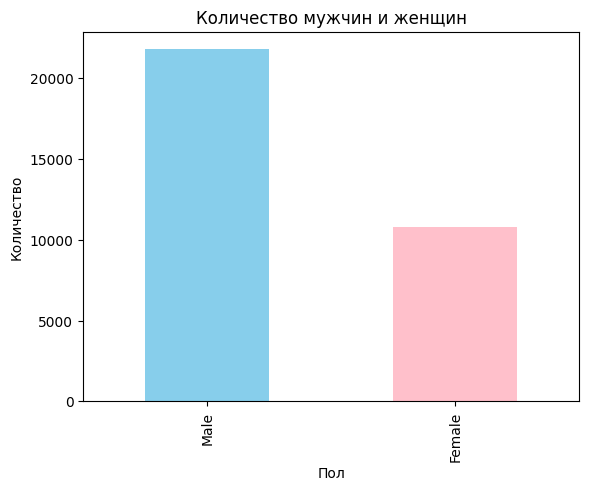

In [20]:
import matplotlib.pyplot as plt

gender_counts = df['sex'].value_counts()
print(gender_counts)

gender_counts.plot(kind='bar', color=['skyblue', 'pink'])
plt.title("Количество мужчин и женщин")
plt.xlabel("Пол")
plt.ylabel("Количество")
plt.show()


# Преобразование race в числовой формат

In [21]:
# Вариант 1: factorize (каждой категории присвоится код)
df['race_encoded'] = pd.factorize(df['race'])[0]

print(df[['race', 'race_encoded']].head(10))

# Вариант 2: One-Hot Encoding
# df = pd.get_dummies(df, columns=['race'], drop_first=True)


    race  race_encoded
0  White             0
1  White             0
2  White             0
3  Black             1
4  Black             1
5  White             0
6  Black             1
7  White             0
8  White             0
9  White             0


# Гистограмма распределения возраста (age)

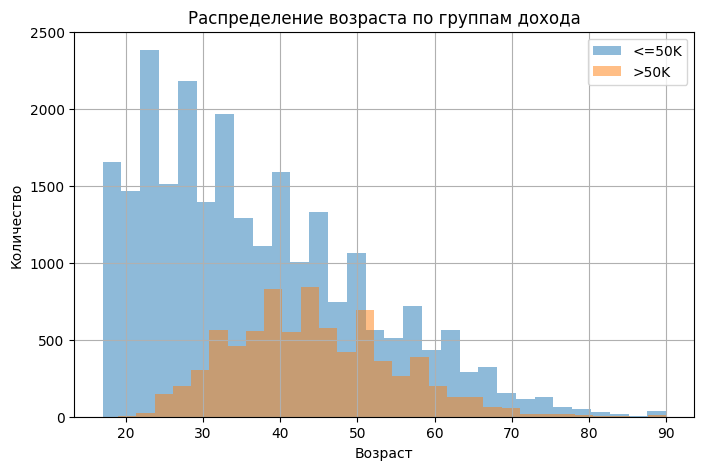

In [22]:

df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

df[df['income'] == '<=50K']['age'].hist(bins=30, alpha=0.5, label='<=50K')
df[df['income'] == '>50K']['age'].hist(bins=30, alpha=0.5, label='>50K')

plt.legend()
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.title("Распределение возраста по группам дохода")
plt.show()



# Новый бинарный признак is_usa

In [23]:
df['is_usa'] = df['native-country'].apply(lambda x: 1 if x == 'United-States' else 0)
print(df[['native-country', 'is_usa']].head(10))


  native-country  is_usa
0  United-States       1
1  United-States       1
2  United-States       1
3  United-States       1
4           Cuba       0
5  United-States       1
6        Jamaica       0
7  United-States       1
8  United-States       1
9  United-States       1
